PART 1: DATA WRANGLING (Ashwin)

1) Load the dataset into a data frame using Pandas.

2) Explore the number of rows and columns, ranges of values, etc.

3) Apply data wrangling techniques that you have learnt to handle missing, incorrect and invalid data.

4) 	Perform any additional steps (e.g., parsing dates, creating additional columns, merging multiple datasets, etc.).

5) Explain your investigation process with your selected data wrangling techniques.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

covid = pd.read_csv('/content/drive/MyDrive/TDW PROJ/Covid-19 Global Dataset.csv')

In [ ]:
print(covid.head())

       country continent  total_confirmed  total_deaths  total_recovered  \
0  Afghanistan      Asia           179267        7690.0         162202.0   
1      Albania    Europe           275574        3497.0         271826.0   
2      Algeria    Africa           265816        6875.0         178371.0   
3      Andorra    Europe            42156         153.0          41021.0   
4       Angola    Africa            99194        1900.0          97149.0   

   active_cases  serious_or_critical  total_cases_per_1m_population  \
0        9375.0               1124.0                           4420   
1         251.0                  2.0                          95954   
2       80570.0                  6.0                           5865   
3         982.0                 14.0                         543983   
4         145.0                  NaN                           2853   

   total_deaths_per_1m_population  total_tests  total_tests_per_1m_population  \
0                           190.0  

In [ ]:
  #Explore the number of rows and columns

  rows, cols = covid.shape

  print(covid.info)


<bound method DataFrame.info of                        country          continent  total_confirmed  \
0                  Afghanistan               Asia           179267   
1                      Albania             Europe           275574   
2                      Algeria             Africa           265816   
3                      Andorra             Europe            42156   
4                       Angola             Africa            99194   
..                         ...                ...              ...   
221  Wallis And Futuna Islands  Australia/Oceania              454   
222             Western Sahara             Africa               10   
223                      Yemen               Asia            11819   
224                     Zambia             Africa           320591   
225                   Zimbabwe             Africa           249206   

     total_deaths  total_recovered  active_cases  serious_or_critical  \
0          7690.0         162202.0        9375.0      

In [ ]:
#Now there are a total of 12 columns and 226 rows. Now, get summary statistics of the numerical columns

print(covid.describe())


       total_confirmed  total_deaths  total_recovered  active_cases  \
count     2.260000e+02  2.180000e+02     2.040000e+02  2.040000e+02   
mean      2.305651e+06  2.884442e+04     2.256851e+06  6.861029e+04   
std       7.575510e+06  9.971254e+04     7.613357e+06  2.350430e+05   
min       2.000000e+00  1.000000e+00     1.000000e+00  0.000000e+00   
25%       2.412600e+04  2.370000e+02     1.619300e+04  2.397500e+02   
50%       1.793750e+05  2.251500e+03     1.372740e+05  1.634000e+03   
75%       1.090902e+06  1.400650e+04     1.006245e+06  1.929675e+04   
max       8.420947e+07  1.026646e+06     8.124426e+07  1.938567e+06   

       serious_or_critical  total_cases_per_1m_population  \
count           145.000000                     226.000000   
mean            269.482759                  148156.809735   
std             883.174727                  155202.909225   
min               1.000000                      16.000000   
25%               5.000000                   11748.2500

In [ ]:
#Now check for any missing values

print(covid.isnull().sum())

country                            0
continent                          0
total_confirmed                    0
total_deaths                       8
total_recovered                   22
active_cases                      22
serious_or_critical               81
total_cases_per_1m_population      0
total_deaths_per_1m_population     8
total_tests                       14
total_tests_per_1m_population     14
population                         0
dtype: int64


In [ ]:
#Alternative way of finding out missing data or values

covid.columns=["Country","Continent","Total_Confirmed","Total_Deaths", "Total_Recovered","Active_Cases","Serious_or_critical","Total_Cases_per_1M_Population", "Total_Deaths_per_1M_Population", "Total_Tests", "Total_Tests_per_1M_population", "Population"]

#before replacing the missing data
print(covid.isnull().sum())

#replace the missing data
#observe that the missing data is contains in Bare_Nuclei
data = covid.replace('?',np.NaN)

print('\nNumber of instances = %d' % (covid.shape[0]))
print('Number of attributes = %d' % (covid.shape[1]))

print('Number of missing values:')
for col in covid.columns:
    print('\t%s: %d' % (col,covid[col].isna().sum()))

Country                            0
Continent                          0
Total_Confirmed                    0
Total_Deaths                       8
Total_Recovered                   22
Active_Cases                      22
Serious_or_critical               81
Total_Cases_per_1M_Population      0
Total_Deaths_per_1M_Population     8
Total_Tests                       14
Total_Tests_per_1M_population     14
Population                         0
dtype: int64

Number of instances = 226
Number of attributes = 12
Number of missing values:
	Country: 0
	Continent: 0
	Total_Confirmed: 0
	Total_Deaths: 8
	Total_Recovered: 22
	Active_Cases: 22
	Serious_or_critical: 81
	Total_Cases_per_1M_Population: 0
	Total_Deaths_per_1M_Population: 8
	Total_Tests: 14
	Total_Tests_per_1M_population: 14
	Population: 0


In [ ]:
#Fill missing values without modifying the original dataset
covid_modified = covid.copy()

#Drop the serious_or_critical column as it's not related
covid_modified = covid_modified.drop(columns=['Serious_or_critical'])

print(covid_modified.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         226 non-null    object 
 1   Continent                       226 non-null    object 
 2   Total_Confirmed                 226 non-null    int64  
 3   Total_Deaths                    218 non-null    float64
 4   Total_Recovered                 204 non-null    float64
 5   Active_Cases                    204 non-null    float64
 6   Total_Cases_per_1M_Population   226 non-null    int64  
 7   Total_Deaths_per_1M_Population  218 non-null    float64
 8   Total_Tests                     212 non-null    float64
 9   Total_Tests_per_1M_population   212 non-null    float64
 10  Population                      226 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 19.5+ KB
None


In [ ]:
#With median
# Fill missing values in specified columns with their median
numeric_columns = ['Total_Deaths', 'Total_Recovered', 'Active_Cases',
                   'Total_Deaths_per_1M_Population',
                   'Total_Tests', 'Total_Tests_per_1M_population']

# Fill with median only for numeric columns
covid_modified[numeric_columns] = covid_modified[numeric_columns].fillna(covid_modified[numeric_columns].median())


In [ ]:
# Verify that there are no more missing values
print(covid_modified.isnull().sum())

Country                           0
Continent                         0
Total_Confirmed                   0
Total_Deaths                      0
Total_Recovered                   0
Active_Cases                      0
Total_Cases_per_1M_Population     0
Total_Deaths_per_1M_Population    0
Total_Tests                       0
Total_Tests_per_1M_population     0
Population                        0
dtype: int64


In [ ]:
print(covid_modified.head())

       Country Continent  Total_Confirmed  Total_Deaths  Total_Recovered  \
0  Afghanistan      Asia           179267        7690.0         162202.0   
1      Albania    Europe           275574        3497.0         271826.0   
2      Algeria    Africa           265816        6875.0         178371.0   
3      Andorra    Europe            42156         153.0          41021.0   
4       Angola    Africa            99194        1900.0          97149.0   

   Active_Cases  Total_Cases_per_1M_Population  \
0        9375.0                           4420   
1         251.0                          95954   
2       80570.0                           5865   
3         982.0                         543983   
4         145.0                           2853   

   Total_Deaths_per_1M_Population  Total_Tests  Total_Tests_per_1M_population  \
0                           190.0     951337.0                        23455.0   
1                          1218.0    1817530.0                       632857.0   

In [ ]:
#Additional Data Wrangling Steps

#Step 1: Add 2 new columns to calculate recovery rate and mortality rate

covid_modified['Recovery_Rate'] = covid_modified['Total_Recovered'] / covid_modified['Total_Confirmed'] * 100
covid_modified['Mortality_Rate'] = covid_modified['Total_Deaths'] / covid_modified['Total_Confirmed'] * 100

In [ ]:
print(covid_modified.head())

       Country Continent  Total_Confirmed  Total_Deaths  Total_Recovered  \
0  Afghanistan      Asia           179267        7690.0         162202.0   
1      Albania    Europe           275574        3497.0         271826.0   
2      Algeria    Africa           265816        6875.0         178371.0   
3      Andorra    Europe            42156         153.0          41021.0   
4       Angola    Africa            99194        1900.0          97149.0   

   Active_Cases  Total_Cases_per_1M_Population  \
0        9375.0                           4420   
1         251.0                          95954   
2       80570.0                           5865   
3         982.0                         543983   
4         145.0                           2853   

   Total_Deaths_per_1M_Population  Total_Tests  Total_Tests_per_1M_population  \
0                           190.0     951337.0                        23455.0   
1                          1218.0    1817530.0                       632857.0   

In [ ]:
#Explore the new number of rows and columns. Now that this table has 13 columns

rows, cols = covid_modified.shape

print(covid_modified.info)


<bound method DataFrame.info of                        Country          Continent  Total_Confirmed  \
0                  Afghanistan               Asia           179267   
1                      Albania             Europe           275574   
2                      Algeria             Africa           265816   
3                      Andorra             Europe            42156   
4                       Angola             Africa            99194   
..                         ...                ...              ...   
221  Wallis And Futuna Islands  Australia/Oceania              454   
222             Western Sahara             Africa               10   
223                      Yemen               Asia            11819   
224                     Zambia             Africa           320591   
225                   Zimbabwe             Africa           249206   

     Total_Deaths  Total_Recovered  Active_Cases  \
0          7690.0         162202.0        9375.0   
1          3497.0      

In [ ]:
#Data Wrangling Step 2: Renaming the columns

# Renaming columns for consistency
covid_modified.rename(columns={
    'Total_Deaths': 'Total_Deaths',
    'Total_Recovered': 'Total_Recovered',
    'Active_Cases': 'Active_Cases',
    'Total_Deaths_per_1M_Population': 'Deaths_per_Million',
    'Total_Tests': 'Total_Tests',
    'Total_Tests_per_1M_population': 'Tests_per_Million',
    'Total_Confirmed': 'Total_Confirmed',
    'Recovery_Rate': 'Recovery_Rate',
    'Mortality_Rate': 'Mortality_Rate'# Ensure this column is included if used in calculations
}, inplace=True)

In [ ]:
# Check the modified DataFrame
print(covid_modified.head())

       Country Continent  Total_Confirmed  Total_Deaths  Total_Recovered  \
0  Afghanistan      Asia           179267        7690.0         162202.0   
1      Albania    Europe           275574        3497.0         271826.0   
2      Algeria    Africa           265816        6875.0         178371.0   
3      Andorra    Europe            42156         153.0          41021.0   
4       Angola    Africa            99194        1900.0          97149.0   

   Active_Cases  Total_Cases_per_1M_Population  Deaths_per_Million  \
0        9375.0                           4420               190.0   
1         251.0                          95954              1218.0   
2       80570.0                           5865               152.0   
3         982.0                         543983              1974.0   
4         145.0                           2853                55.0   

   Total_Tests  Tests_per_Million  Population  Recovery_Rate  Mortality_Rate  
0     951337.0            23455.0    405606

In [ ]:
covid_modified.to_csv('/content/drive/My Drive/Covid-19_Global_Dataset_Modified.csv', index=False)


PART 2: Exploratory Data Analysis (Shan)

1) Compute the mean, sum, range and other interesting statistics for numeric columns.

2) Explain your investigation process with your selected statistics.


In [ ]:
#Get basic information about the dataset (data types, non-null counts)
print("\nBasic information about the dataset:")
print(covid_modified.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        226 non-null    object 
 1   Continent                      226 non-null    object 
 2   Total_Confirmed                226 non-null    int64  
 3   Total_Deaths                   226 non-null    float64
 4   Total_Recovered                226 non-null    float64
 5   Active_Cases                   226 non-null    float64
 6   Total_Cases_per_1M_Population  226 non-null    int64  
 7   Deaths_per_Million             226 non-null    float64
 8   Total_Tests                    226 non-null    float64
 9   Tests_per_Million              226 non-null    float64
 10  Population                     226 non-null    int64  
 11  Recovery_Rate                  226 non-null    float64
 12  Mortality_Ra

In [ ]:
#Compute statistics for each numeric column one by one

# List of numeric columns
numeric_columns = covid_modified.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column and calculate mean, sum, and range
for column in numeric_columns:
    print(f"\nStatistics for '{column}':")

    # Mean
    col_mean = covid_modified[column].mean()
    print(f"  Mean: {col_mean}")

    # Sum
    col_sum = covid_modified[column].sum()
    print(f"  Sum: {col_sum}")

    # Range (max - min)
    col_range = covid_modified[column].max() - covid_modified[column].min()
    print(f"  Range: {col_range}")

    # Additional interesting statistics
    col_median = covid_modified[column].median()
    col_std = covid_modified[column].std()
    col_var = covid_modified[column].var()

    print(f"  Median: {col_median}")
    print(f"  Standard Deviation: {col_std}")
    print(f"  Variance: {col_var}")
    print("-" * 40)


Statistics for 'Total_Confirmed':
  Mean: 2305651.115044248
  Sum: 521077152
  Range: 84209471
  Median: 179375.0
  Standard Deviation: 7575510.377482183
  Variance: 57388357479340.25
----------------------------------------

Statistics for 'Total_Deaths':
  Mean: 27903.075221238938
  Sum: 6306095.0
  Range: 1026645.0
  Median: 2251.5
  Standard Deviation: 98047.59656383948
  Variance: 9613331191.945429
----------------------------------------

Statistics for 'Total_Recovered':
  Mean: 2050520.6238938053
  Sum: 463417661.0
  Range: 81244259.0
  Median: 137274.0
  Standard Deviation: 7258939.36159245
  Variance: 52692200655276.21
----------------------------------------

Statistics for 'Active_Cases':
  Mean: 62090.4778761062
  Sum: 14032448.0
  Range: 1938567.0
  Median: 1634.0
  Standard Deviation: 224141.4385248583
  Variance: 50239384463.992836
----------------------------------------

Statistics for 'Total_Cases_per_1M_Population':
  Mean: 148156.80973451328
  Sum: 33483439
  Rang

PART 3: Data Visualisation (Joachim)

1) Explore distributions of numeric columns using histograms, etc.

2) Explore relationship between columns using scatter plots, bar charts, etc.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Country', 'Continent', 'Total_Confirmed', 'Total_Deaths',
       'Total_Recovered', 'Active_Cases', 'Total_Cases_per_1M_Population',
       'Deaths_per_Million', 'Total_Tests', 'Tests_per_Million', 'Population',
       'Recovery_Rate', 'Mortality_Rate'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        226 non-null    object 
 1   continent                      226 non-null    object 
 2   total_confirmed                226 non-null    int64  
 3   total_deaths                   226 non-null    float64
 4   total_recovered                226 non-null    float64
 5   active_cases                   226 non-null    float64
 

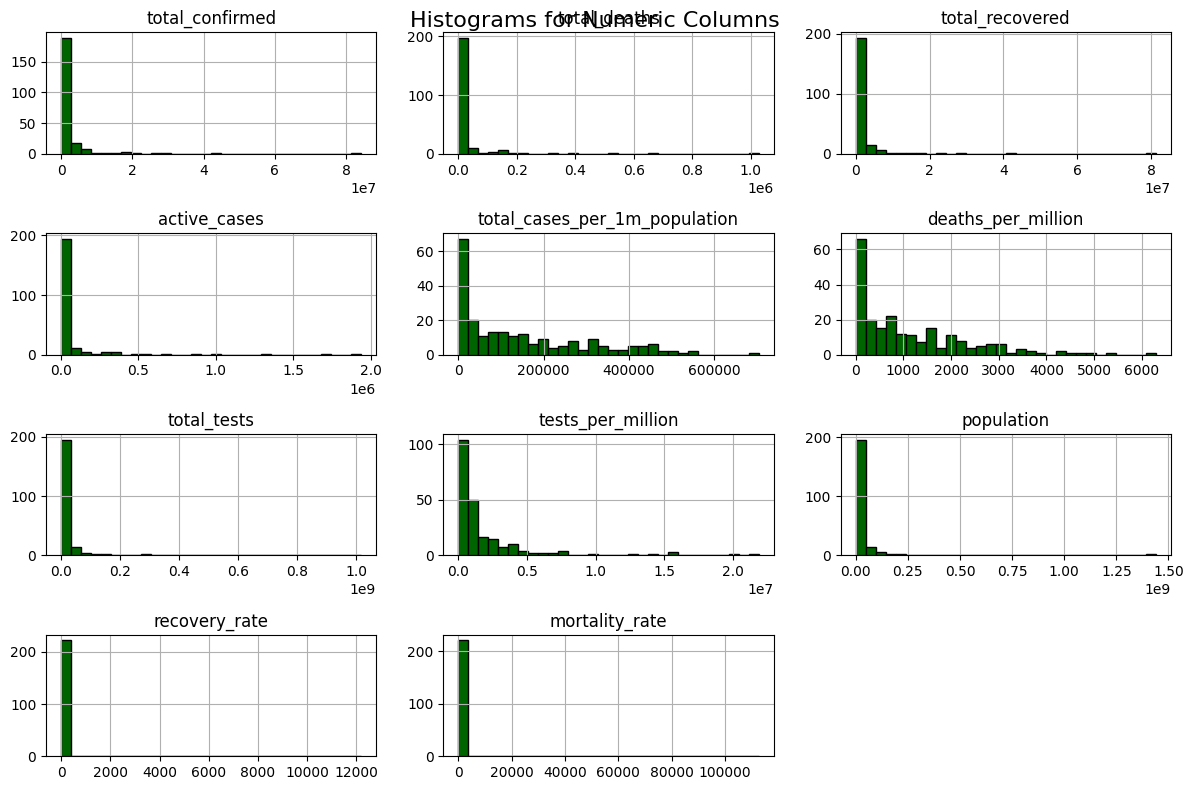

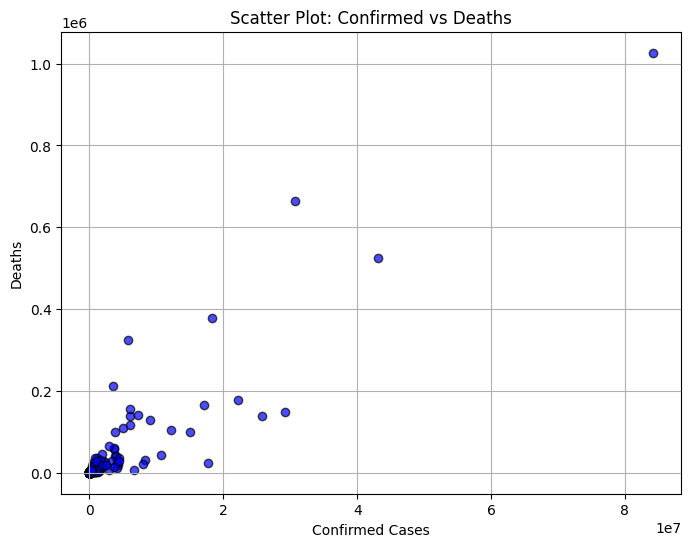

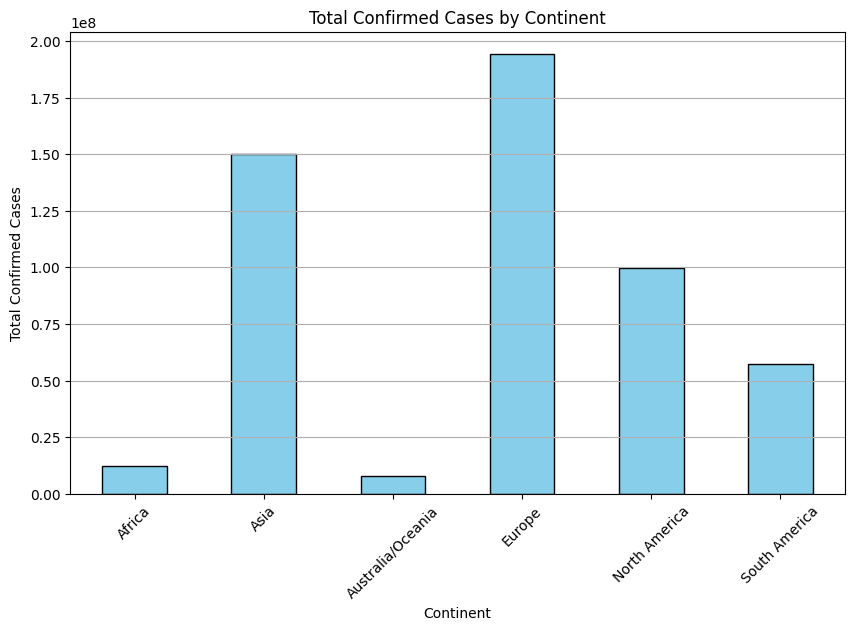

<Figure size 1000x600 with 0 Axes>

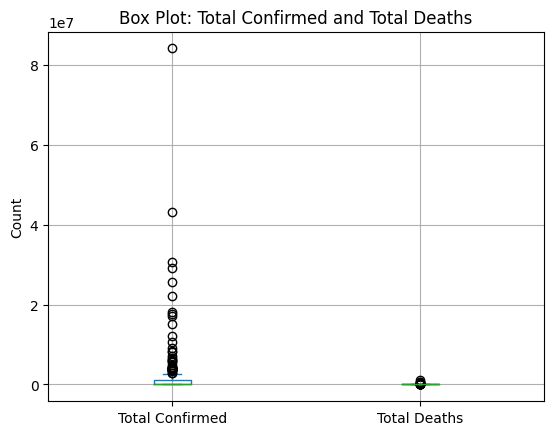

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load CSV file
df = pd.read_csv('/content/drive/My Drive/Covid-19_Global_Dataset_Modified.csv')

# Inspect the dataset (Check column names)
print(df.columns)  # Check actual column names

# Optionally rename columns to lowercase and strip spaces
df.columns = df.columns.str.strip().str.lower()  # Lowercase and remove spaces

# Inspect the dataset (Optional)
df.info()  # Check data types of columns
df.describe()  # Summary statistics for numeric columns

# Plot histograms for numeric columns
df.hist(figsize=(12, 8), bins=30, color='darkgreen', edgecolor='black')
plt.tight_layout()
plt.suptitle('Histograms for Numeric Columns', fontsize=16)
plt.show()

# Plot scatter plot for two numeric columns
# Example: Scatter plot between 'total_confirmed' and 'total_deaths'
plt.figure(figsize=(8, 6))
plt.scatter(df['total_confirmed'], df['total_deaths'], color='blue', edgecolor='black', alpha=0.7)
plt.title('Scatter Plot: Confirmed vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()

# Plot bar chart for total confirmed cases by continent
plt.figure(figsize=(10, 6))
df.groupby('continent')['total_confirmed'].sum().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Confirmed Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot box plot for total confirmed and total deaths
plt.figure(figsize=(10, 6))
df[['total_confirmed', 'total_deaths']].plot(kind='box', grid=True)
plt.title('Box Plot: Total Confirmed and Total Deaths')
plt.ylabel('Count')
plt.xticks([1, 2], ['Total Confirmed', 'Total Deaths'])  # Rename x-ticks
plt.show()



<Figure size 1000x600 with 0 Axes>

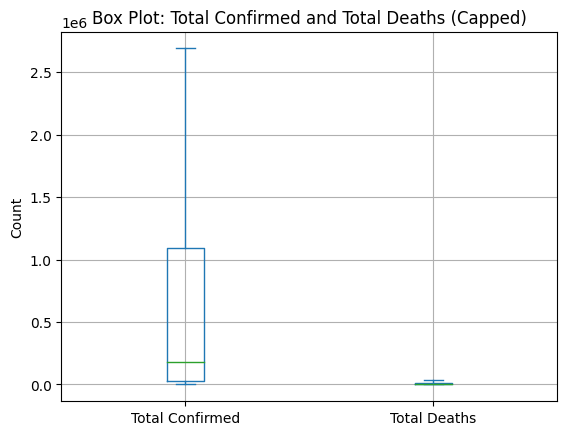

In [ ]:
#Now there seems to be outliers in the box plot. We need to remove it

#We can remove the outliers using Interquartile Range Method

# Define the upper and lower limits based on IQR
Q1 = df[['total_confirmed', 'total_deaths']].quantile(0.25)
Q3 = df[['total_confirmed', 'total_deaths']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping
df_capped = df.copy()
df_capped[['total_confirmed', 'total_deaths']] = df[['total_confirmed', 'total_deaths']].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Re-plot the box plot after capping
plt.figure(figsize=(10, 6))
df_capped[['total_confirmed', 'total_deaths']].plot(kind='box', grid=True)
plt.title('Box Plot: Total Confirmed and Total Deaths (Capped)')
plt.ylabel('Count')
plt.xticks([1, 2], ['Total Confirmed', 'Total Deaths'])  # Rename x-ticks
plt.show()